<a href="https://colab.research.google.com/github/dpcks/playdata/blob/main/data_processing/11_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# colab 한글 깨짐 방지
- 실행후에 런타임 다시 시작할 것


In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name()
fm._rebuild()
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')
df.head() # 꽃 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.columns =["꽃받침길이","꽃받침너비","꽃잎길이","꽃잎너비","꽃종류"]
df.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,꽃종류
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info

<bound method DataFrame.info of      꽃받침길이  꽃받침너비  꽃잎길이  꽃잎너비        꽃종류
0      5.1    3.5   1.4   0.2     setosa
1      4.9    3.0   1.4   0.2     setosa
2      4.7    3.2   1.3   0.2     setosa
3      4.6    3.1   1.5   0.2     setosa
4      5.0    3.6   1.4   0.2     setosa
..     ...    ...   ...   ...        ...
145    6.7    3.0   5.2   2.3  virginica
146    6.3    2.5   5.0   1.9  virginica
147    6.5    3.0   5.2   2.0  virginica
148    6.2    3.4   5.4   2.3  virginica
149    5.9    3.0   5.1   1.8  virginica

[150 rows x 5 columns]>

# Seaborn 
- 내부적으로 Matplotlib 을 호출하여 시각화하는 라이브러리


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


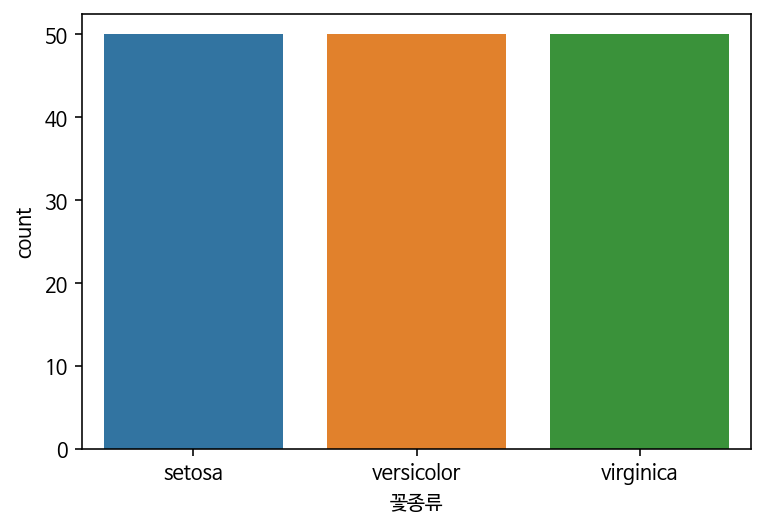

In [ ]:
sns.countplot(df["꽃종류"])
plt.show()

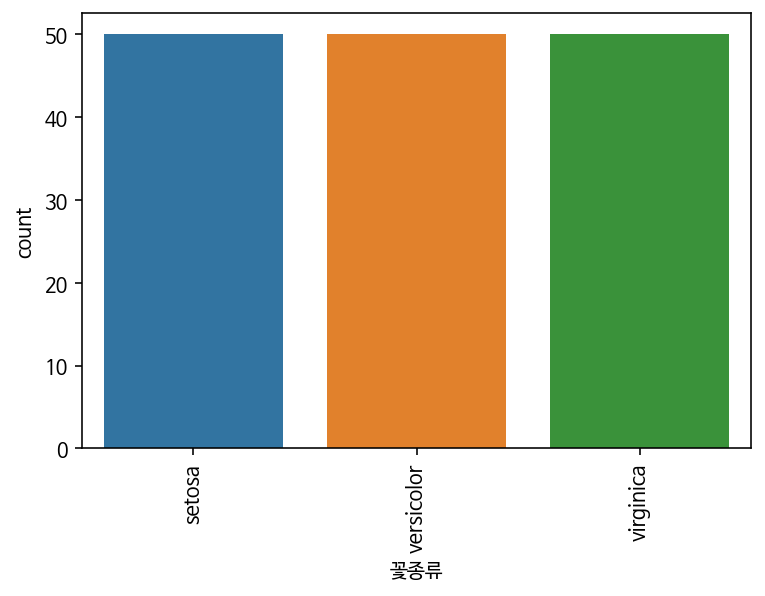

In [ ]:
sns.countplot(x="꽃종류",data=df).tick_params(axis="x",labelrotation=90)
plt.show()

# seaborn 그래프 종류
- Relational plots
    - 두 변수의 관계를 볼때
- Distribution plots
    - 변수의 데이터의 분포를 볼때 
- Categotical plots
    - 범주형 변수의 집계나 범주형 변수와 수치형 변수간에 관계를 볼때 

## Relational plots

- line plot

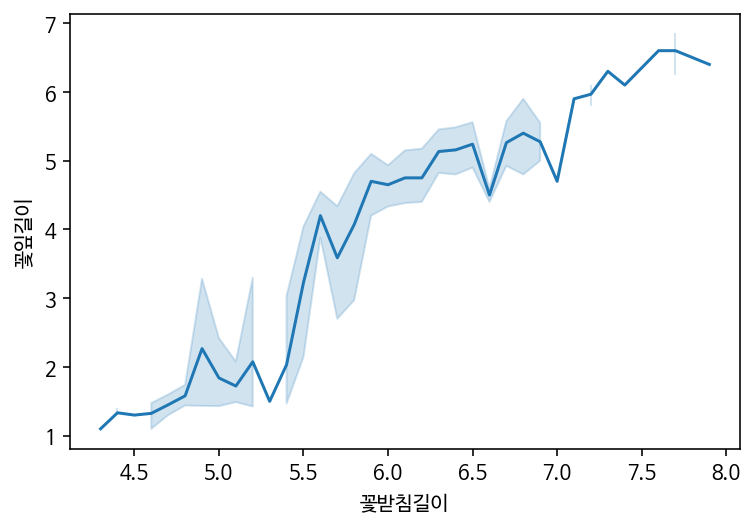

In [ ]:
sns.lineplot(x = "꽃받침길이" , y="꽃잎길이", data=df)
plt.show()

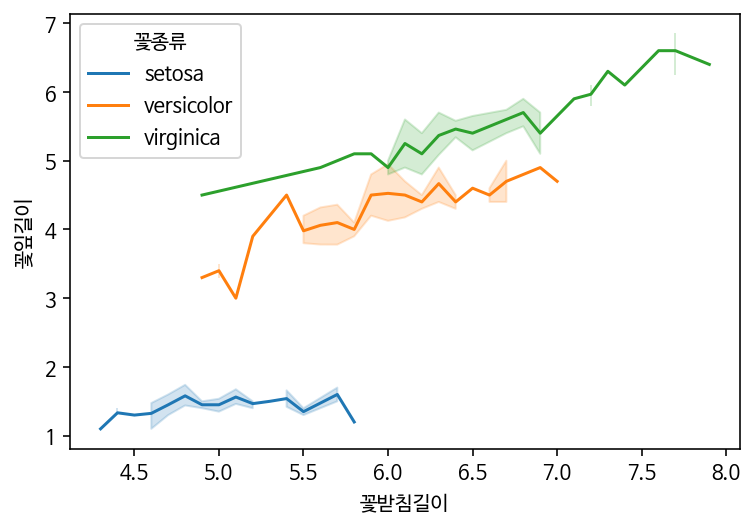

In [ ]:
sns.lineplot(x="꽃받침길이",y="꽃잎길이",hue="꽃종류", data =df)
plt.show()

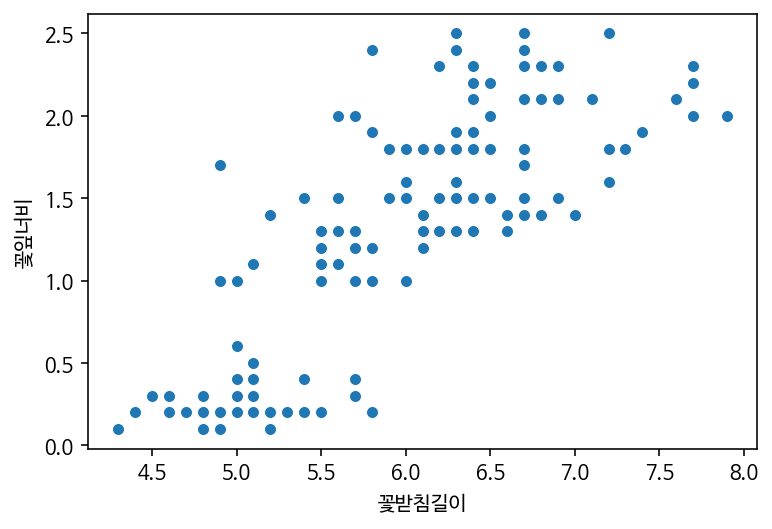

In [ ]:
sns.scatterplot(x="꽃받침길이",y="꽃잎너비",data=df)
plt.show() # 양의 상관관계가 있다고 볼 수 있다.

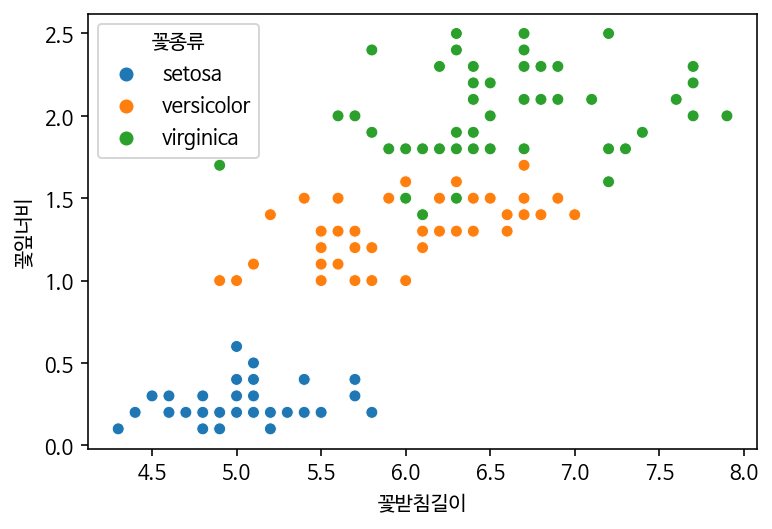

In [ ]:
sns.scatterplot(x="꽃받침길이",y="꽃잎너비",hue="꽃종류",data=df)
plt.show() # 선형관계가 크게 있지는 않음

- relplot
    - lineplot 과 scatterplot 모두 그릴수 있다.

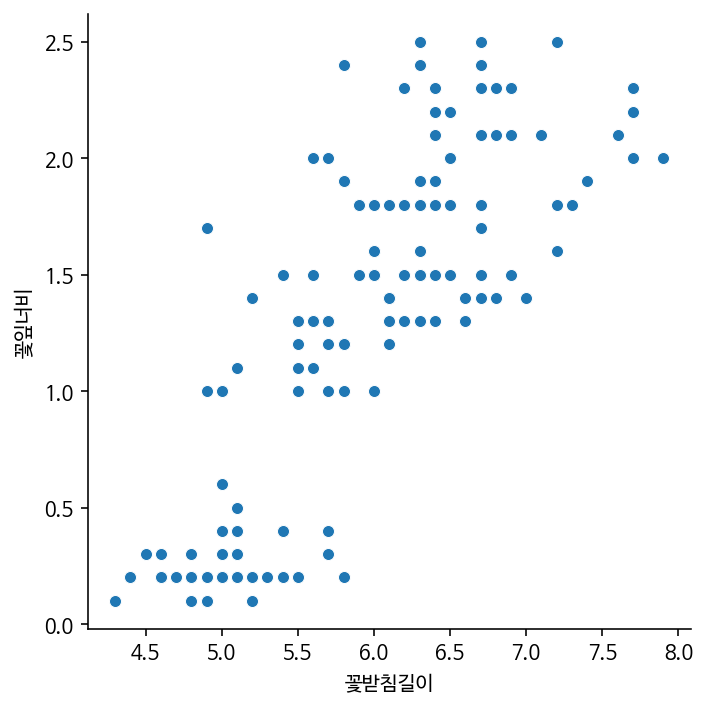

In [ ]:
sns.relplot(x="꽃받침길이",y="꽃잎너비",data=df) #kind="line" 선으로 나타난다.
plt.show()

- col 아규먼트는 열, row 아규먼트는 행

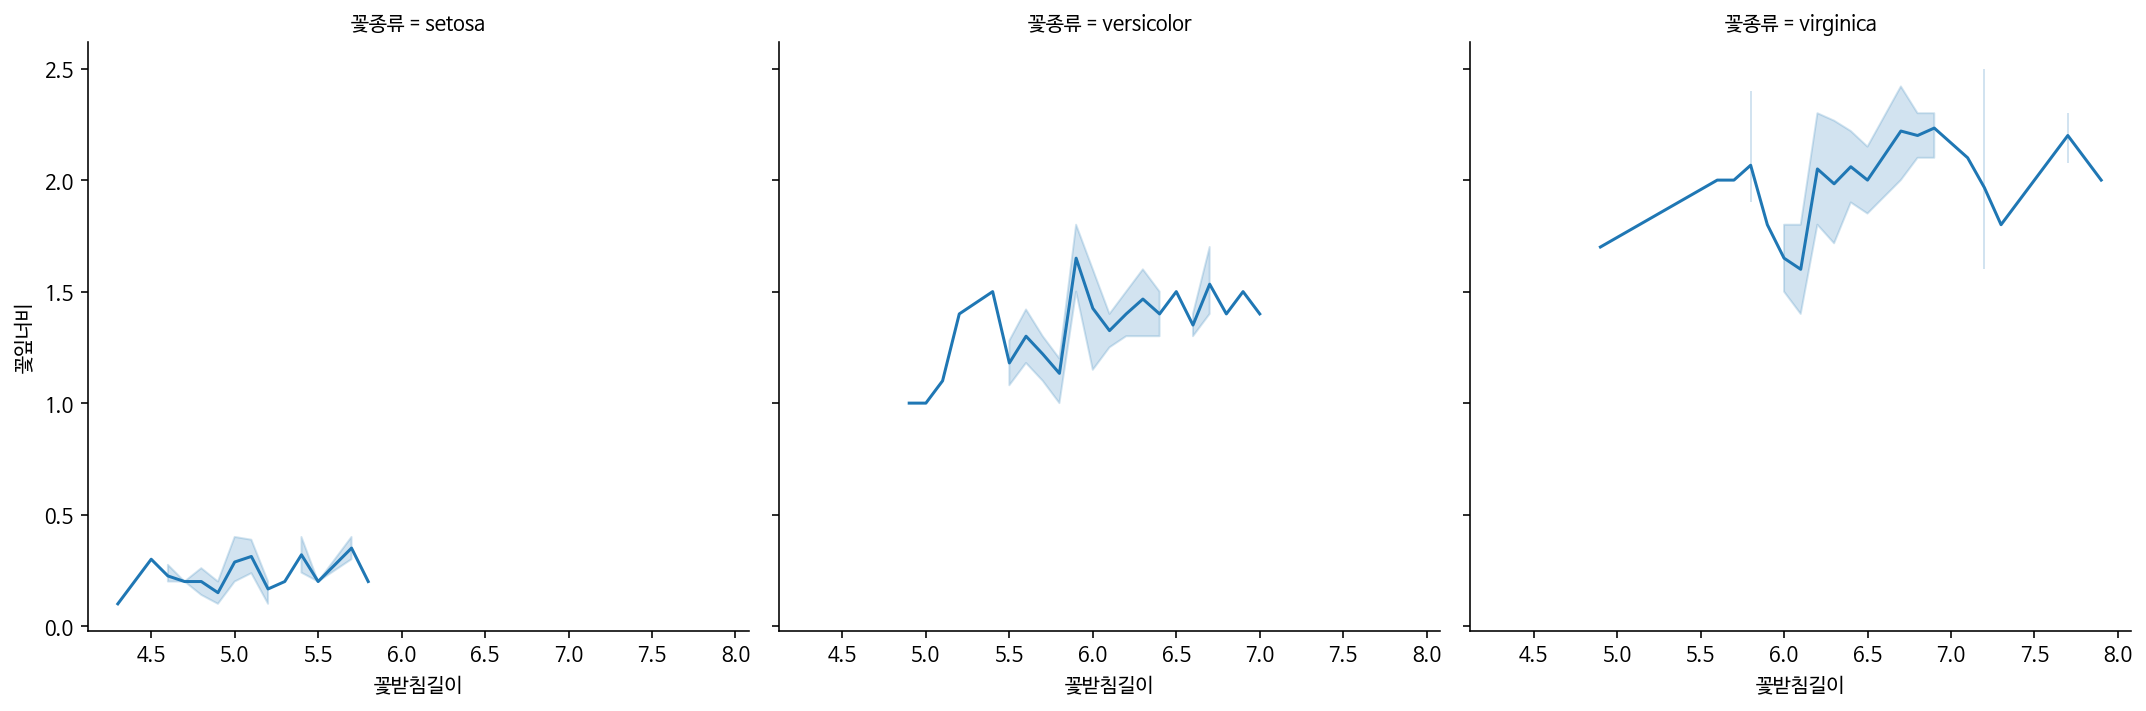

In [ ]:
sns.relplot(x="꽃받침길이", y="꽃잎너비",kind="line",data=df, col="꽃종류")
plt.show()

- lmplot 
    - 추정회귀선과 산점도를 그린다.
    - 추정회귀선이란 x 에 따른 y값의 변화를 잘 설명하는 직선

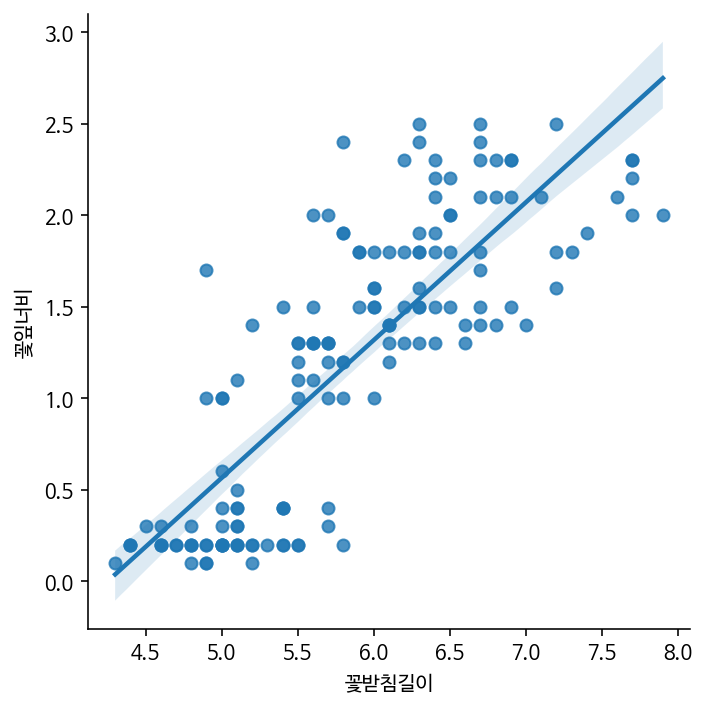

In [ ]:
sns.lmplot(x="꽃받침길이",y="꽃잎너비",data=df)
plt.show()

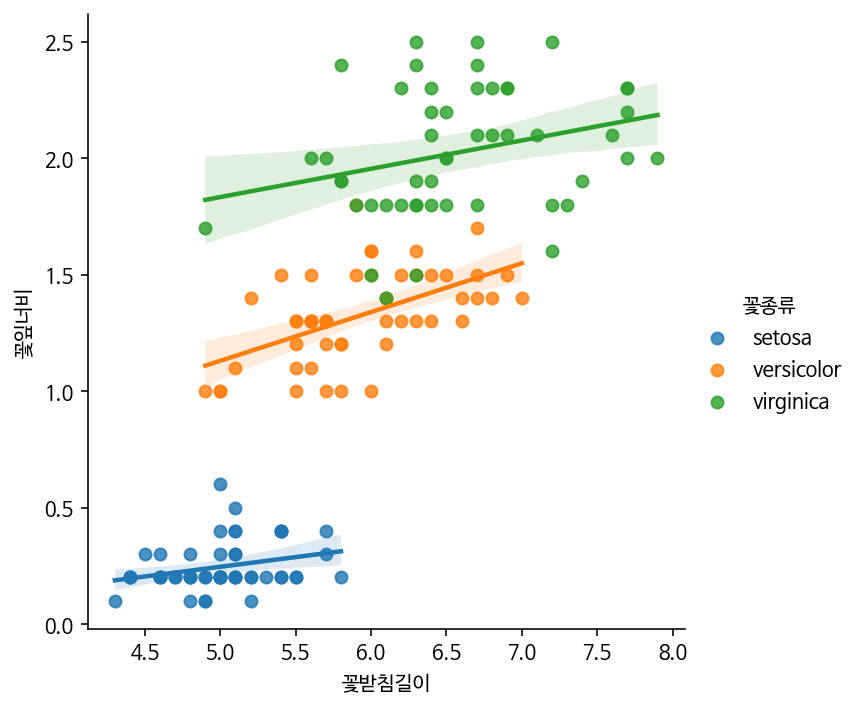

In [ ]:
sns.lmplot(x="꽃받침길이",y="꽃잎너비", hue="꽃종류",data=df)
plt.show()

- heatmap


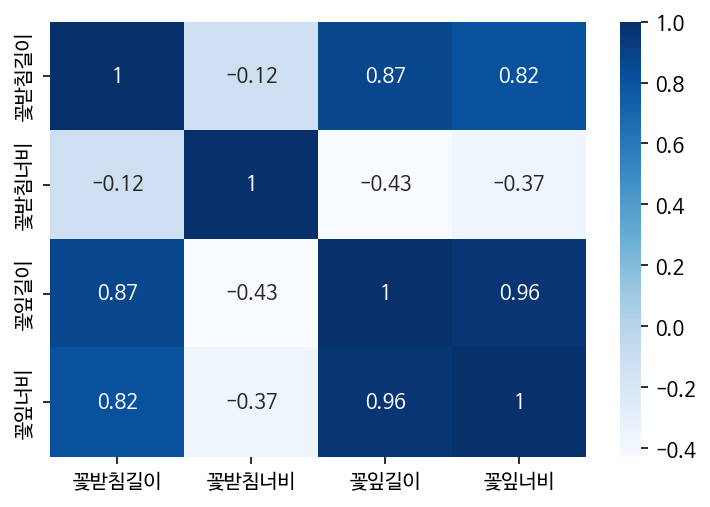

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

- pairplot
    - 대각선 방향으로 히스토그램을 나타낸다.
    - 서로 다른 두변수간의 산점도를 그린다.
    

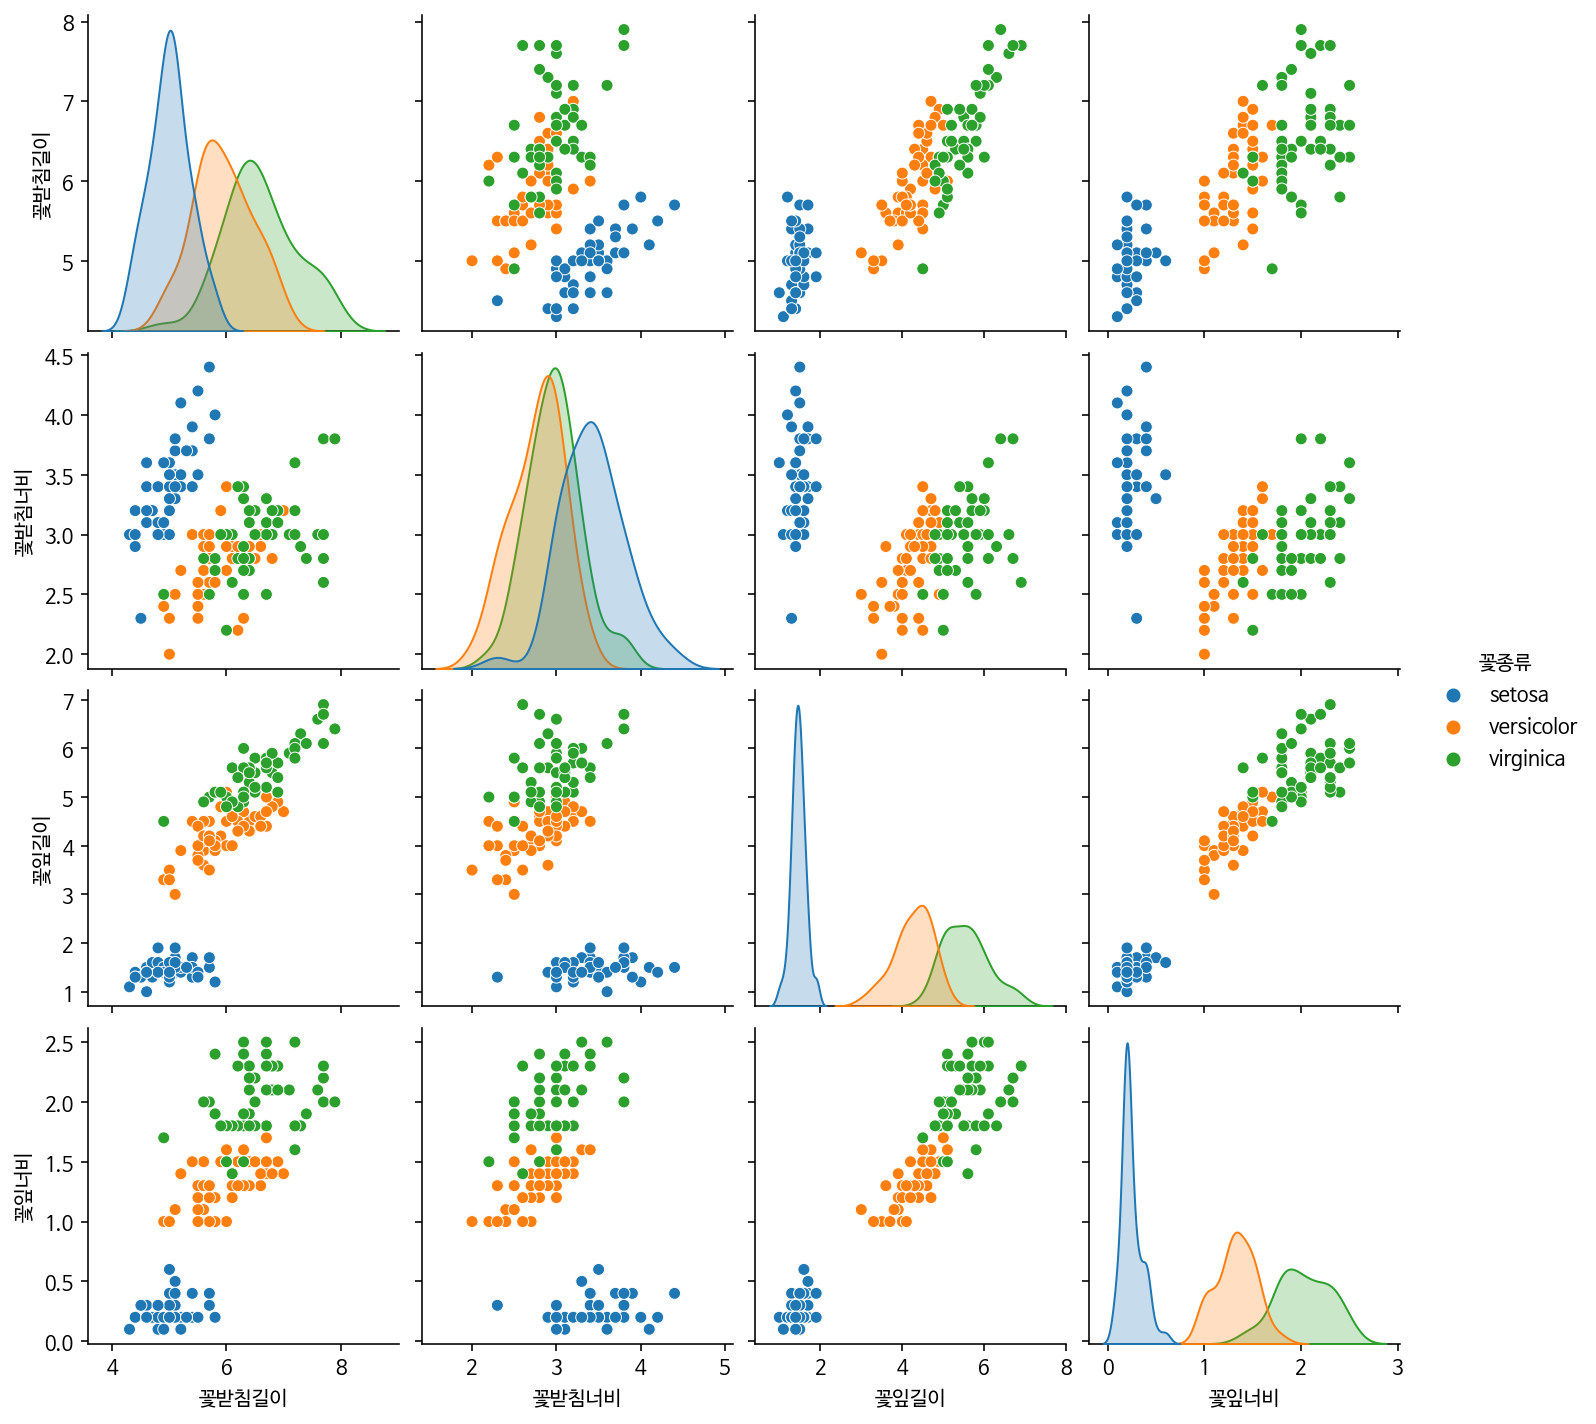

In [ ]:
sns.pairplot(data=df,hue="꽃종류")
plt.show()

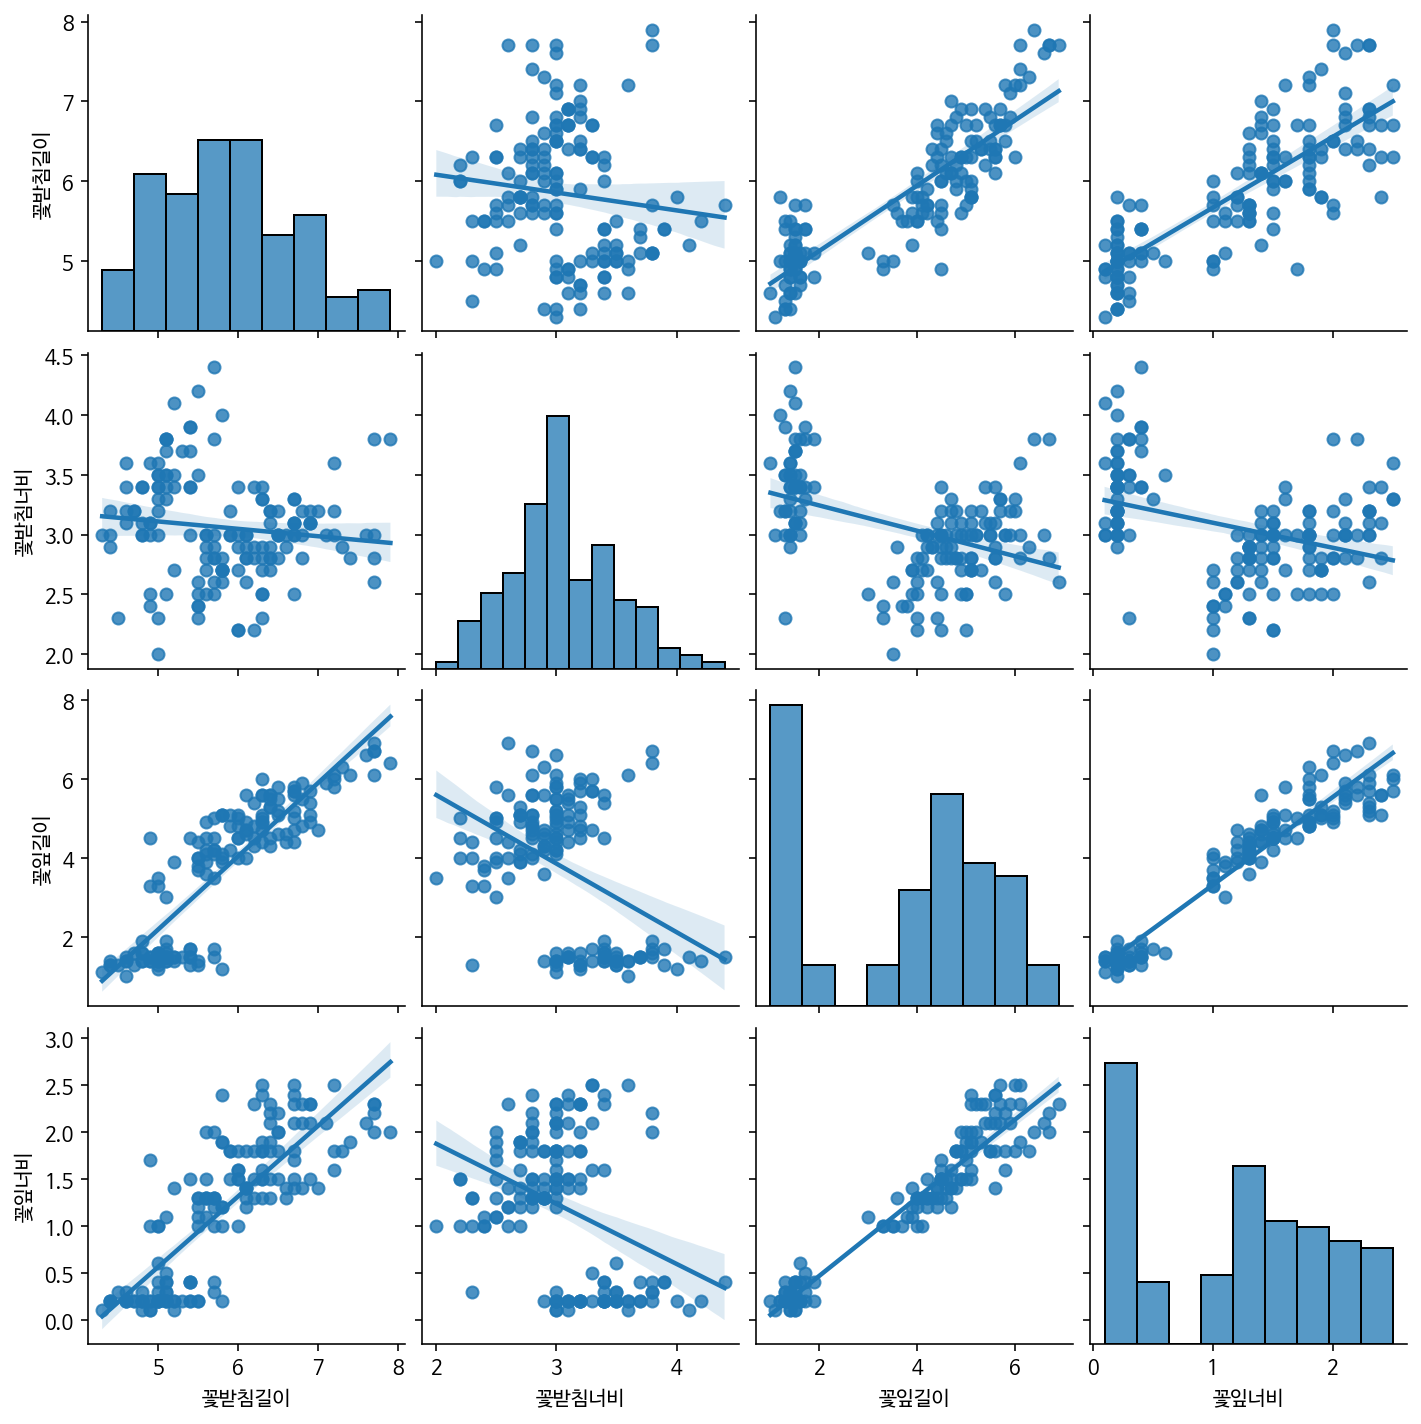

In [ ]:
# 추정회귀선 같이 그려주기
sns.pairplot(data=df,kind="reg")
plt.show()

## Distribution plots


- distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


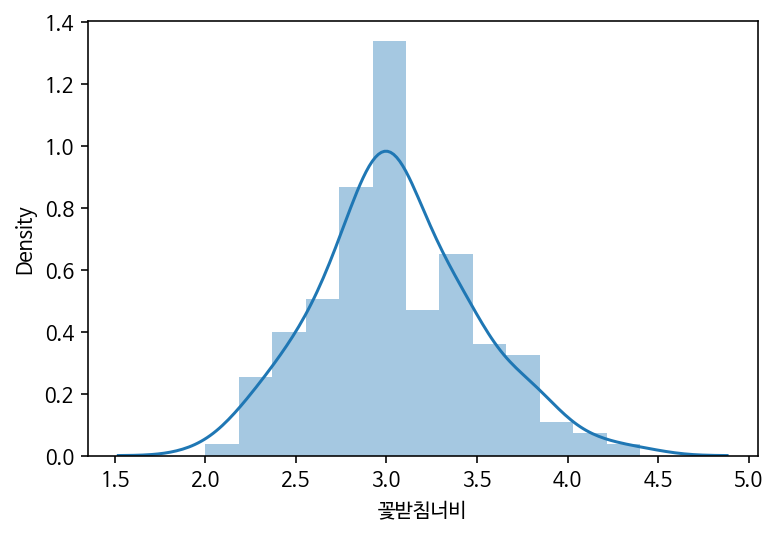

In [ ]:
sns.distplot(df["꽃받침너비"])
plt.show() # 직관적으로 정규분포형태인지 알수 있따.

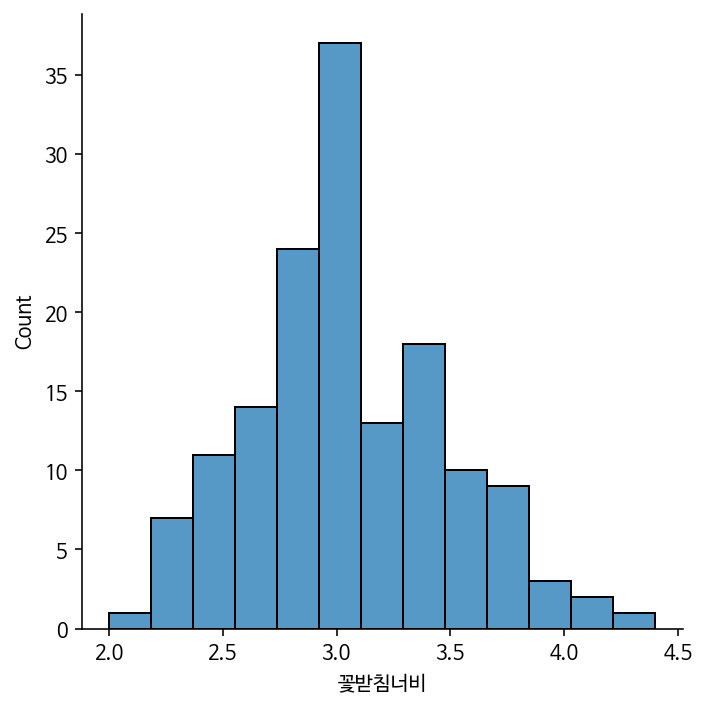

In [ ]:
sns.displot(df["꽃받침너비"]) # kind="kde"
plt.show() 

- kdeplot

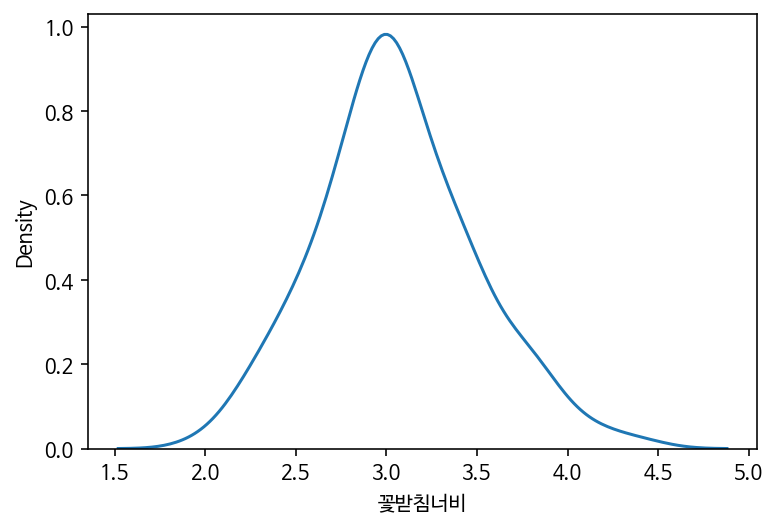

In [ ]:
sns.kdeplot(df["꽃받침너비"])
plt.show() # 정규분포형태인지 확인할 수 있다.

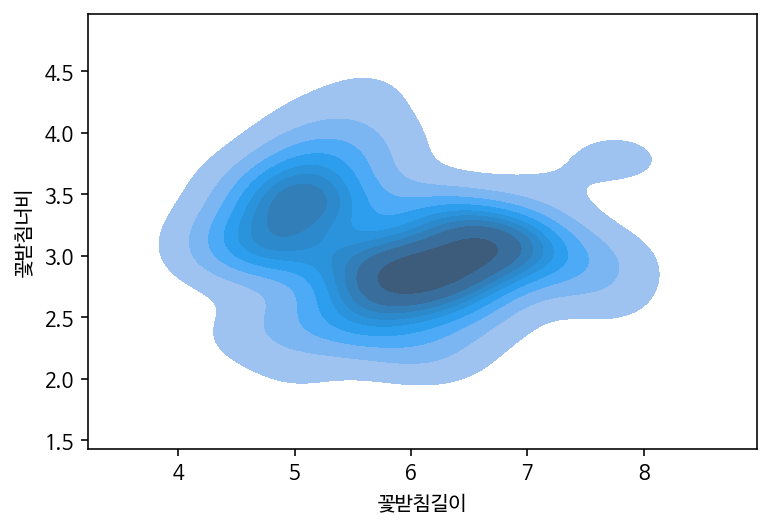

In [ ]:
sns.kdeplot(x="꽃받침길이",y="꽃받침너비",data=df,shade=True) # 진한쪽이 데이터가 많이 몰려있다
plt.show()

## Categorical plots

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
cols_rename = {
    "survived" : "생존여부",
    "pclass" : "티켓등급",
    "sex" : "성별",
    "age":"나이",
    "sibsp":"형제자매_배우자수",
    "parch":"부모_자식수",
    "fare": "운임",
    "embarked" : "탑승항구"
}
df = df.rename(columns = cols_rename)
df.head()

,생존여부,티켓등급,성별,나이,형제자매_배우자수,부모_자식수,운임,탑승항구,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- countplot

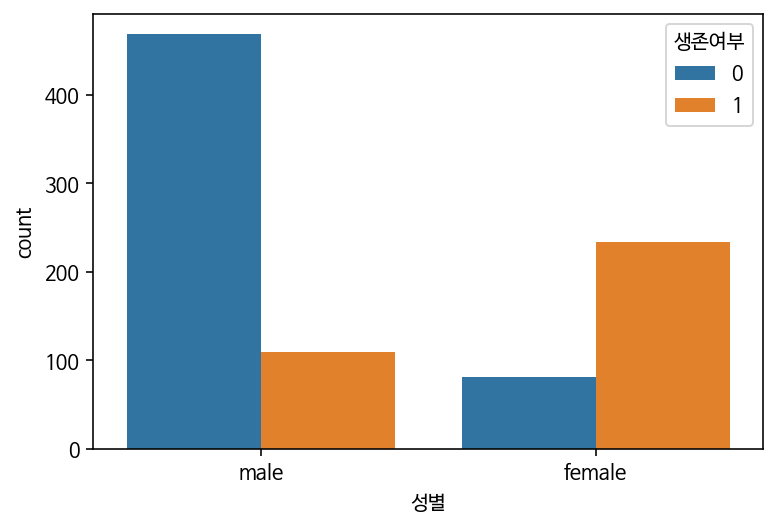

In [ ]:
# 성별로 생존여부 카운팅!
sns.countplot(x="성별",hue="생존여부",data=df)
plt.show()

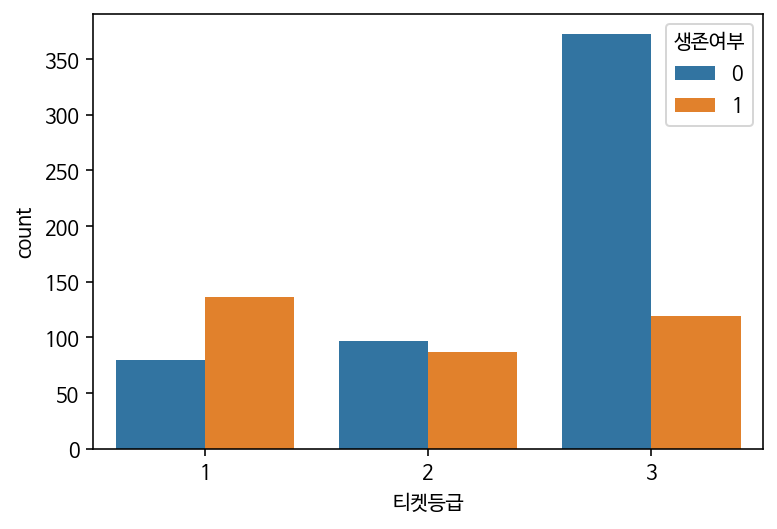

In [ ]:
# 티켓등급별로 생존여부 카운팅!
sns.countplot(x="티켓등급", hue="생존여부", data=df)
plt.show()

- barplot
    - x(범주형) 에 대한 y(수치형)의 통계치를 bar 형태로 시각화
    - 신뢰구간도 표시!!

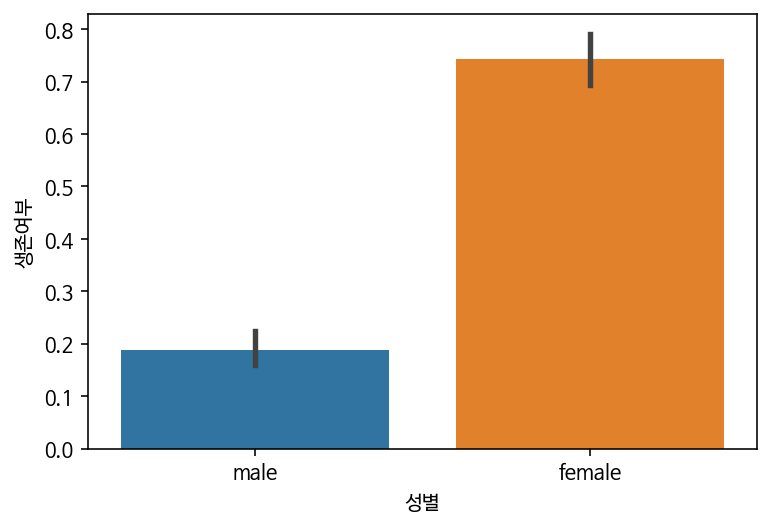

In [ ]:
# 성별 생존 비율(수치에 대해서 평균) 을 보고싶다면?
sns.barplot(x="성별",y="생존여부", data=df) # 기본값이 평균!! 
plt.show() 

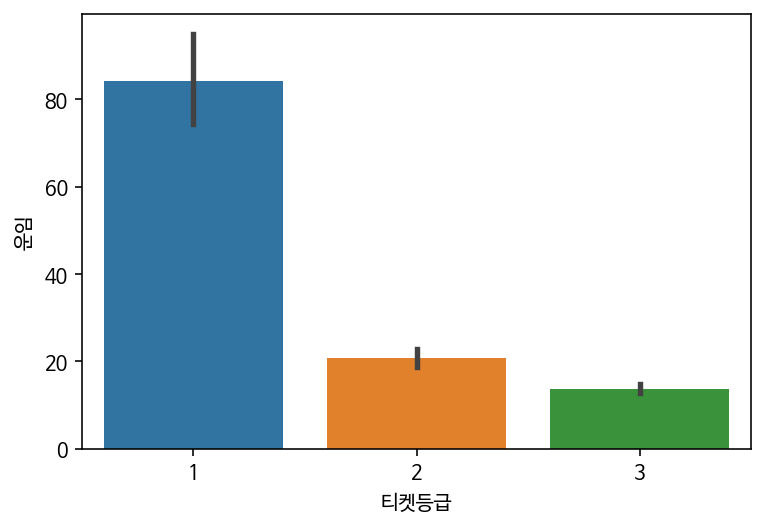

In [ ]:
# 티켓 등급별로 운임료의 평균
sns.barplot(x="티켓등급",y="운임",data=df)
plt.show()

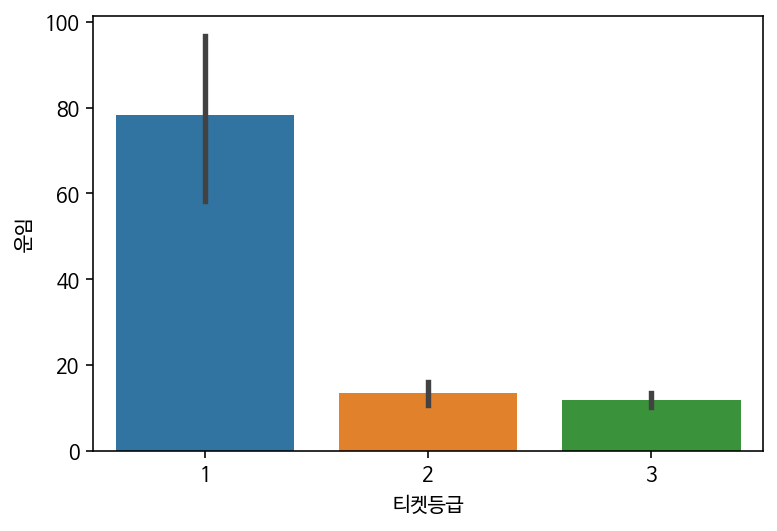

In [ ]:
# 티켓등급별로 운임료의 표준편차를 보고싶다면?
sns.barplot(x="티켓등급", y="운임",data=df, estimator=np.std)
plt.show()

- boxplot

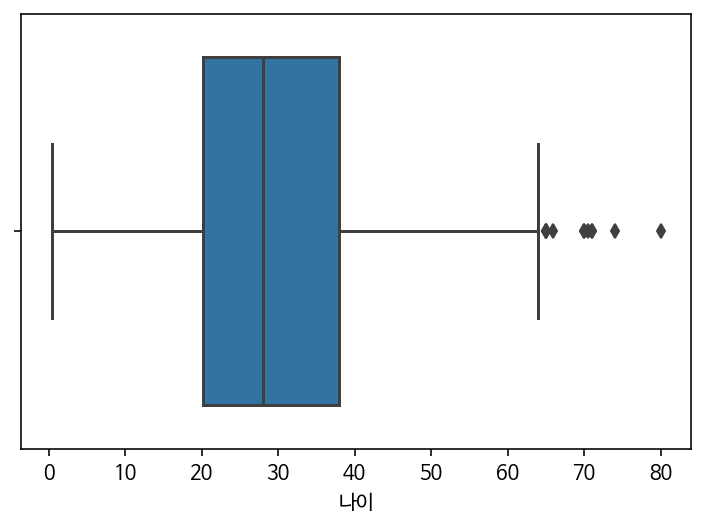

In [ ]:
sns.boxplot(x="나이",data=df)
plt.show() # 나이가 많은쪽에 이상치가 존재 

In [ ]:
df

,생존여부,티켓등급,성별,나이,형제자매_배우자수,부모_자식수,운임,탑승항구,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


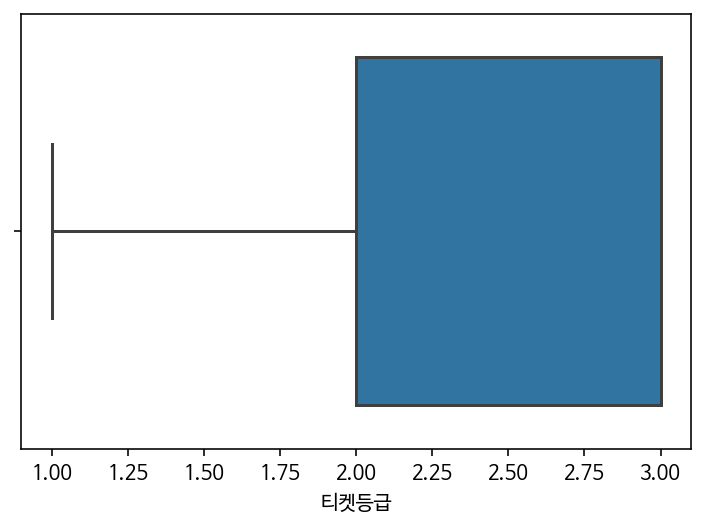

In [ ]:
sns.boxplot(x="티켓등급",data=df)
plt.show()

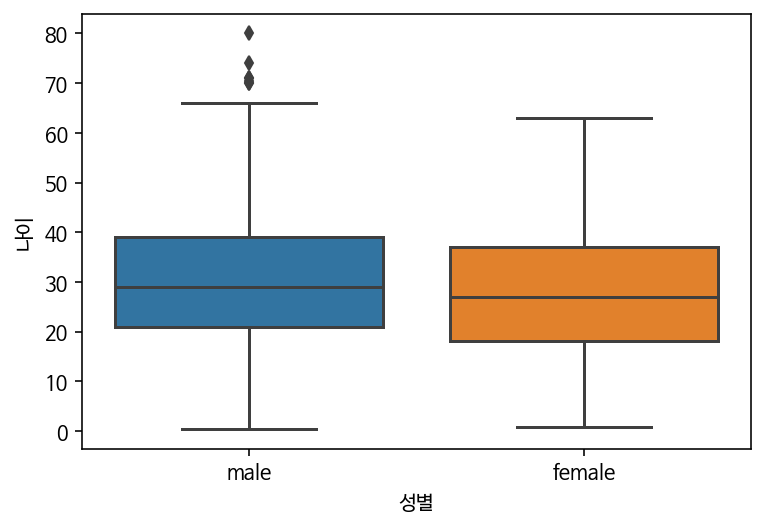

In [ ]:
# 성별로 나이에 대한 boxplot 보고싶다면?
sns.boxplot(x="성별",y="나이",data=df)
plt.show()

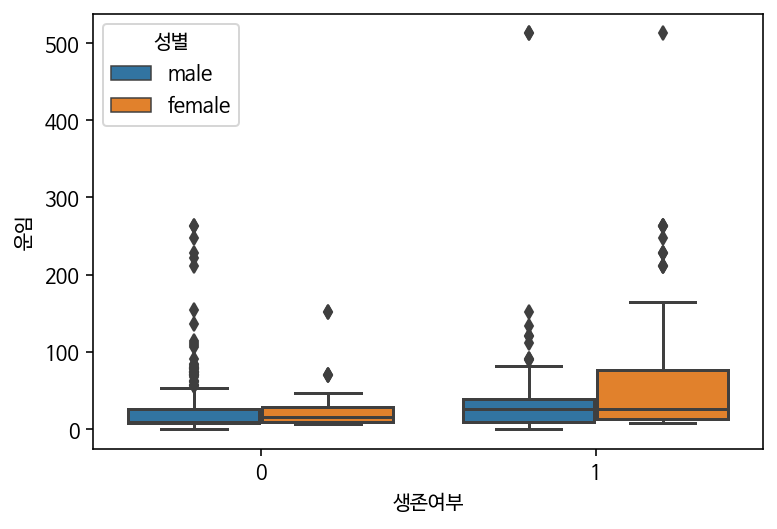

In [ ]:
# 각 생존여부에 대하여 성별로 운임에 대한 boxplot을 보고싶다면?
sns.boxplot(x="생존여부",hue="성별",y="운임",data=df) # 그룹바이 기준으로 x가 첫번째키 hue가 두번째키 y가 세번째키
plt.show() 

http://seaborn.pydata.org/examples/index.html

#  protly 프로틀리 [발표형]